# Part of the BSc thesis "The impact of public incentives for electric mobility: a multidimensional and international analysis" 

*** Please find the datasets used for this analysis under the following link:
https://github.com/Kholopov/electric-mobility/raw/master/Datasets.zip ***

EV market uptake is measured by the number of BEV registrations. Note: we use words ‘sales’ and ‘registrations’ interchangeably. As can be seen from Fig. 1.1 and 1.2, the snapshots of global BEV and passenger vehicle markets at the end of 2016, regardless of scale, seem identical or linearly related, suggesting that BEV sales do not have to be corrected for market sizes (checked formally in Section 3.1).

# Variables

EV market uptake is measured by the number of BEV registrations. Note: we use words ‘sales’ and ‘registrations’ interchangeably. As can be seen from Fig. 1.1 and 1.2, the snapshots of global BEV and passenger vehicle markets at the end of 2016, regardless of scale, seem identical or linearly related, suggesting that BEV sales do not have to be corrected for market sizes (checked formally in Section 3.1).

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

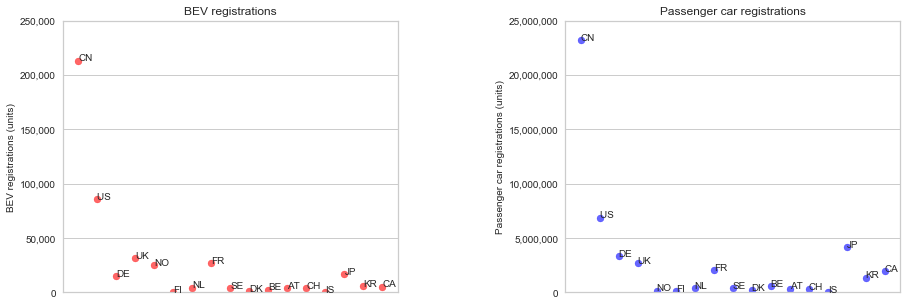

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl



data_variables = pd.read_excel('Variables.xlsx', sheet_name = 0)
data_variables.head()
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.scatter(x = data_variables['Countries'],
            y = data_variables['Number of BEV car registrations'],
            c='red',
            alpha=0.6)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_title('BEV registrations', fontsize=12)
ax1.set_ylabel('BEV registrations (units)', fontsize=10)
ax1.set_xticks([])

for country in range(len(data_variables['Countries'])):
    ax1.text(x = data_variables['Countries'][country],
             y = data_variables['Number of BEV car registrations'][country],
             s = data_variables['Countries'][country],
             fontsize=10)
ax1.set_ylim(0, 250000)

ax2 = fig.add_subplot(122)
ax2.scatter(x = data_variables['Countries'],
            y = data_variables['All passenger car registrations'],
            c='blue',
            alpha=0.6)

ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_title('Passenger car registrations', fontsize=12)
ax2.set_ylabel('Passenger car registrations (units)', fontsize=10)
ax2.set_xticks([])

for country in range(len(data_variables['Countries'])):
    ax2.text(x = data_variables['Countries'][country],
             y = data_variables['All passenger car registrations'][country],
             s = data_variables['Countries'][country],
             fontsize=10)
ax2.set_ylim(0, 25000000)

plt.subplots_adjust(wspace=0.5, hspace = 0.5)
plt.show()

# Method

Instead, a multiple log-linear ordinary least squares (OLS) regression model was built incorporating the variables from Table 1 (see Appendix 8.1). The logarithmic transformation of the response variable is appropriate when dealing with a skewed distribution of the data (see Appendix 8.1, Graph 1.1 and 1.2). 

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'BEV registrations'),
 Text(0.5, 1.0, 'Histogram of BEV registrations')]

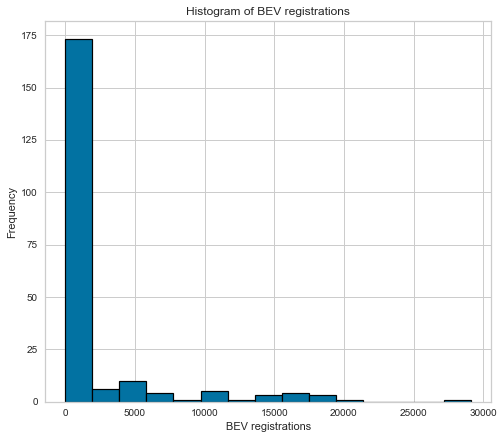

In [50]:
full_data = pd.read_excel('Full Data.xlsx', sheet_name=0)
plt.hist(full_data['BEV registrations'], bins=15, edgecolor='black', linewidth=1.2)
plt.gca().set(title='Histogram of BEV registrations', xlabel='BEV registrations', ylabel='Frequency')


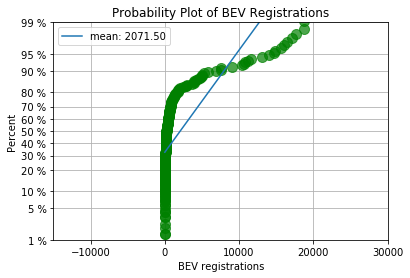

In [1]:
import numpy as np
import scipy.stats as stats
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, Locator
import pandas as pd

class PPFScale(mscale.ScaleBase):
    name = 'ppf'

    def __init__(self, axis, **kwargs):
        mscale.ScaleBase.__init__(self, axis, **kwargs)
 

    def get_transform(self):
        return self.PPFTransform()

    def set_default_locators_and_formatters(self, axis):
        class PercFormatter(Formatter):
            def __call__(self, x, pos=None):
                # \u00b0 : degree symbol
                return "%d %%" % (x*100)

        class PPFLocator(Locator):
            def __call__(self):
                return np.array([1,5,10,20,30,40,50,60,70,80,90,95,99])/100.0

        axis.set_major_locator(PPFLocator())
        axis.set_major_formatter(PercFormatter())
        axis.set_minor_formatter(PercFormatter())

    def limit_range_for_scale(self, vmin, vmax, minpos):
        return max(vmin, 1e-6), min(vmax, 1-1e-6)

    class PPFTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def ___init__(self, thresh):
            mtransforms.Transform.__init__(self)
            self.thresh = thresh

        def transform_non_affine(self, a):
            out = stats.norm.ppf(a)
            return out


        def inverted(self):
            return PPFScale.IPPFTransform()

    class IPPFTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def transform_non_affine(self, a):

            return stats.norm.cdf(a)

        def inverted(self):
            return PPFScale.PPFTransform()

mscale.register_scale(PPFScale)


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    import statsmodels.api as sm

    #import data
    full_data = pd.read_excel('Full Data.xlsx', sheet_name=0)

    values=full_data['BEV registrations'].values
    values.sort()

    #calculate empirical CDF
    cumprob = sm.distributions.ECDF(values)(values)

    #fit data
    loc, scale = stats.norm.fit(values)
    pffit = stats.norm(loc=loc,scale=scale)

    x = np.linspace(values.min(),values.max(),3)
    ax = plt.subplot(111)
    ax.plot(values,cumprob, 'go', alpha=0.7, markersize=10)
    ax.plot(x,pffit.cdf(x),'-',label='mean: {:.2f}'.format(loc))
    ax.set_yscale('ppf')
    ax.set_xlim(-15000, 30100)
    ax.set_ylim(0.01,0.99)
    ax.grid(True)
    ax.legend(loc=0)
    plt.gca().set(title='Probability Plot of BEV Registrations', xlabel='BEV registrations', ylabel='Percent')
    plt.show()

However, the Box-Cox transformation with a natural logarithm did not normalize the distribution of BEV registrations (see Appendix 8.1, Graph 1.3, 1.4 and 1.5). 

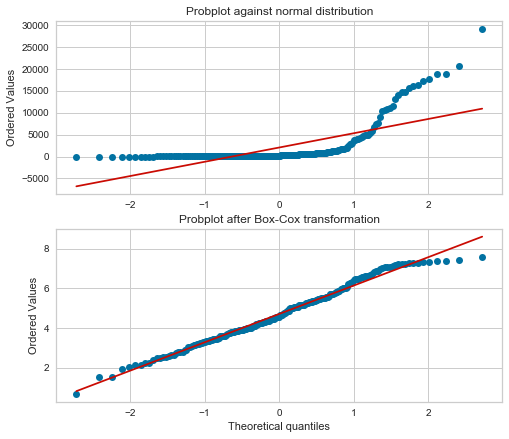

In [49]:
# Graph 1.3

fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(full_data['BEV registrations'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')


ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(full_data['BEV registrations'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)
plt.show()

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'ln BEV registrations'),
 Text(0.5, 1.0, 'Histogram of ln BEV registrations')]

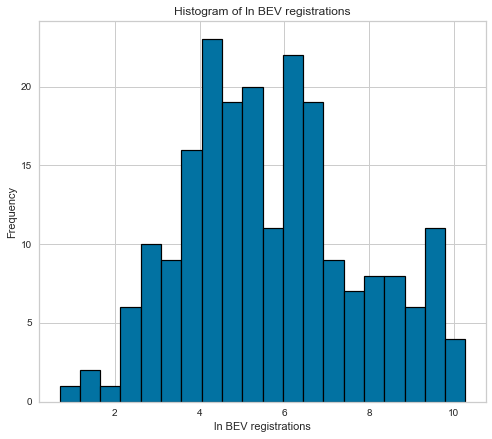

In [42]:
# Graph 1.4
plt.hist(full_data['ln BEV reg-ns'], bins=20, edgecolor='black', linewidth=1.2)
plt.gca().set(title='Histogram of ln BEV registrations', xlabel='ln BEV registrations', ylabel='Frequency')


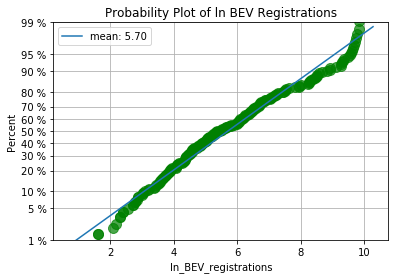

In [6]:
# Graph 1.5
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    import statsmodels.api as sm

    #import data
    full_data = pd.read_excel('Full Data.xlsx', sheet_name=0)

    values=full_data['ln BEV reg-ns'].values
    values.sort()

    #calculate empirical CDF
    cumprob = sm.distributions.ECDF(values)(values)

    #fit data
    loc, scale = stats.norm.fit(values)
    pffit = stats.norm(loc=loc,scale=scale)

    x = np.linspace(values.min(),values.max(),3)
    ax = plt.subplot(111)
    ax.plot(values,cumprob, 'go', alpha=0.7, markersize=10)
    ax.plot(x,pffit.cdf(x),'-',label='mean: {:.2f}'.format(loc))
    ax.set_yscale('ppf')
    #ax.set_xlim(-15000, 30100)
    ax.set_ylim(0.01,0.99)
    ax.grid(True)
    ax.legend(loc=0)
    plt.gca().set(title='Probability Plot of ln BEV Registrations', xlabel='ln_BEV_registrations', ylabel='Percent')
    plt.show()


Still, we keep it because it helps to tackle its heteroscedasticity characteristic (see Appendix 8.1, Graph 1.6 and 1.7). 

C:\Users\maria.kholopova\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


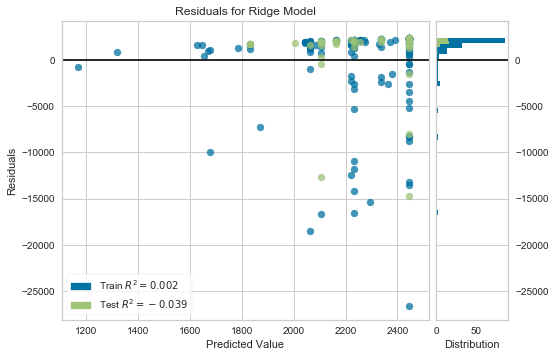

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import statsmodels
import seaborn as sns

file="FullData_1.xlsx"
dataset = pd.read_excel(file, sheet_name='FullData_1')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 15].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

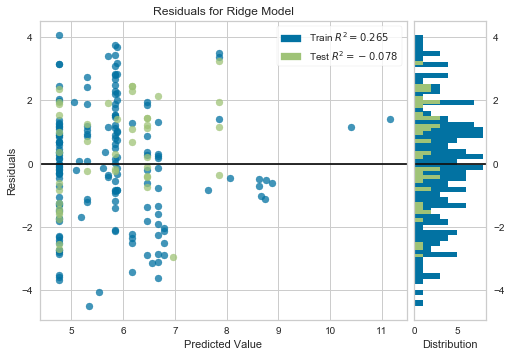

In [2]:
# Importing the dataset
file="FullData_1.xlsx"
dataset = pd.read_excel(file, sheet_name='FullData_1')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 14].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

Alternative residual plots (similar to Appendix 8.1, Graph 1.6 and 1.7):

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8763
Date:                Mon, 13 Apr 2020   Prob (F-statistic):              0.350
Time:                        19:41:13   Log-Likelihood:                -2087.2
No. Observations:                 212   AIC:                             4178.
Df Residuals:                     210   BIC:                             4185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2349.1846    432.763      5.428      0.0

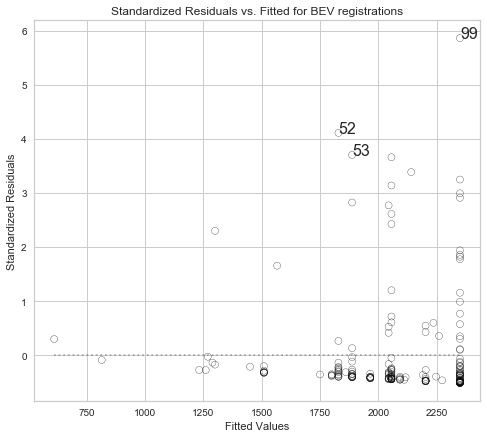

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Standardized Residuals'),
 Text(0.5, 1.0, 'Histogram of Standardized Residuals for BEV registrations')]

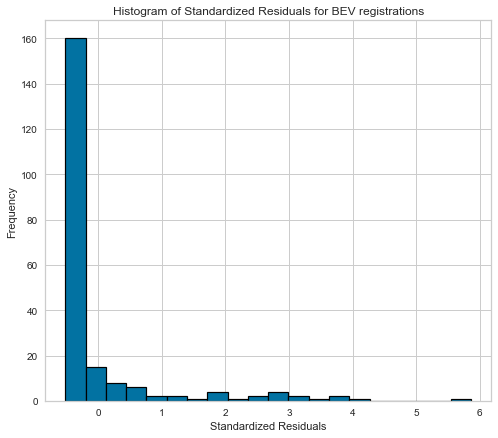

In [43]:
import statsmodels.formula.api as smf
import patsy
file="FullData_1.xlsx"
dataset = pd.read_excel(file, sheet_name='FullData_1')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 15].values
df = pd.DataFrame({'x':X, 'y':y})
model = smf.ols(formula='y~x', data=df).fit()
print(model.summary())

standardized_residuals=pd.Series(model.get_influence().resid_studentized_internal)
fitted = model.fittedvalues
top3 = abs(standardized_residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, standardized_residuals, edgecolors = 'k', facecolors = 'none')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Standardized Residuals vs. Fitted for BEV registrations')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],standardized_residuals[i]))

plt.show()

plt.hist(standardized_residuals, bins=20, edgecolor='black', linewidth=1.2)
plt.gca().set(title='Histogram of Standardized Residuals for BEV registrations', xlabel='Standardized Residuals', ylabel='Frequency')


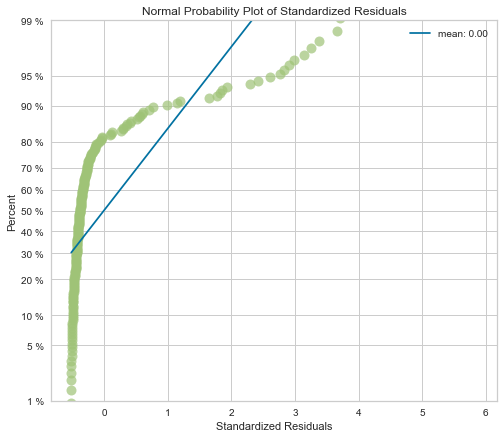

In [4]:
import scipy.stats as stats
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, Locator

class PPFScale(mscale.ScaleBase):
    name = 'ppf'

    def __init__(self, axis, **kwargs):
        mscale.ScaleBase.__init__(self, axis, **kwargs)
 
        #self.thresh = None

    def get_transform(self):
        return self.PPFTransform()

    def set_default_locators_and_formatters(self, axis):
        class PercFormatter(Formatter):
            def __call__(self, x, pos=None):
                # \u00b0 : degree symbol
                return "%d %%" % (x*100)

        class PPFLocator(Locator):
            def __call__(self):
                return np.array([1,5,10,20,30,40,50,60,70,80,90,95,99])/100.0

        axis.set_major_locator(PPFLocator())
        axis.set_major_formatter(PercFormatter())
        axis.set_minor_formatter(PercFormatter())

    def limit_range_for_scale(self, vmin, vmax, minpos):
        return max(vmin, 1e-6), min(vmax, 1-1e-6)

    class PPFTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def ___init__(self, thresh):
            mtransforms.Transform.__init__(self)
            self.thresh = thresh

        def transform_non_affine(self, a):
            out = stats.norm.ppf(a)
            return out


        def inverted(self):
            return PPFScale.IPPFTransform()

    class IPPFTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True
        
        def transform_non_affine(self, a):

            return stats.norm.cdf(a)

        def inverted(self):
            return PPFScale.PPFTransform()

mscale.register_scale(PPFScale)
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    import statsmodels.api as sm

    values=standardized_residuals
        
    values.sort_values()

    #calculate empirical CDF
    cumprob = sm.distributions.ECDF(values)(values)

    #fit data
    loc, scale = stats.norm.fit(values)
    pffit = stats.norm(loc=loc,scale=scale)

    x = np.linspace(values.min(),values.max(),3)
    ax = plt.subplot(111)
    ax.plot(values,cumprob, 'go', alpha=0.7, markersize=10)
    ax.plot(x,pffit.cdf(x),'-',label='mean: {:.2f}'.format(loc))
    ax.set_yscale('ppf')
    ax.set_ylim(0.01,0.99)
    ax.grid(True)
    ax.legend(loc=0)
    plt.gca().set(title='Normal Probability Plot of Standardized Residuals for BEV registrations', xlabel='Standardized Residuals', ylabel='Percent')
    plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     64.36
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           7.22e-14
Time:                        19:43:05   Log-Likelihood:                -424.38
No. Observations:                 212   AIC:                             852.8
Df Residuals:                     210   BIC:                             859.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7685      0.170     28.091      0.0

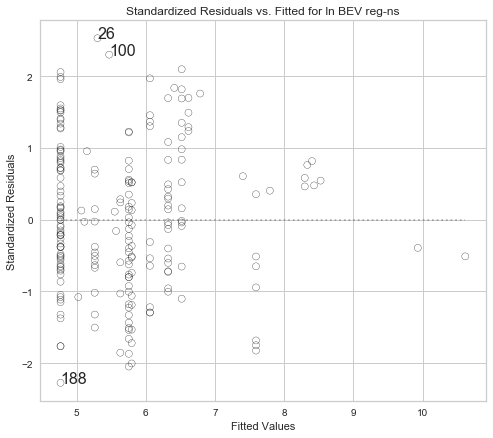

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Standardized Residuals'),
 Text(0.5, 1.0, 'Histogram of Standardized Residuals for ln BEV reg-ns')]

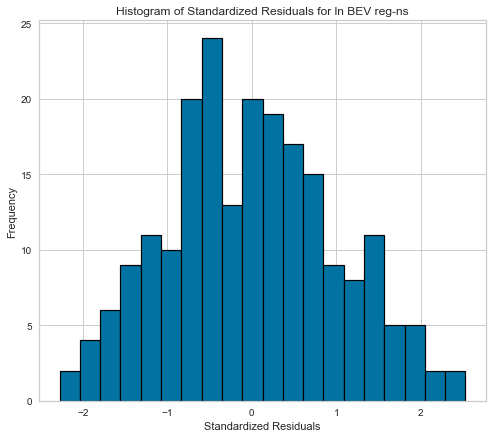

In [44]:
file="FullData_1.xlsx"
dataset = pd.read_excel(file, sheet_name='FullData_1')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 14].values
df = pd.DataFrame({'x':X, 'y':y})
model = smf.ols(formula='y~x', data=df).fit()
print(model.summary())

standardized_residuals=pd.Series(model.get_influence().resid_studentized_internal)
fitted = model.fittedvalues
top3 = abs(standardized_residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, standardized_residuals, edgecolors = 'k', facecolors = 'none')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Standardized Residuals vs. Fitted for ln BEV reg-ns')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],standardized_residuals[i]))

plt.show()

plt.hist(standardized_residuals, bins=20, edgecolor='black', linewidth=1.2)
plt.gca().set(title='Histogram of Standardized Residuals for ln BEV reg-ns', xlabel='Standardized Residuals', ylabel='Frequency')


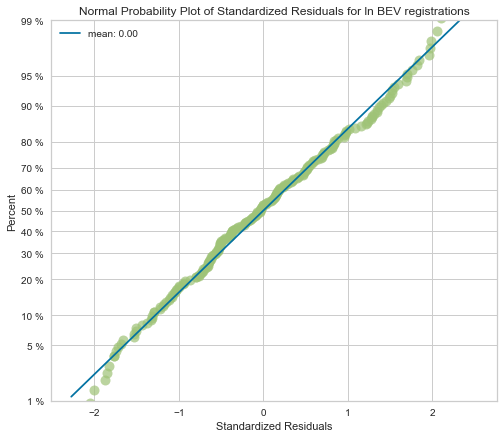

In [7]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    import statsmodels.api as sm

    values=standardized_residuals
        
    values.sort_values()

    #calculate empirical CDF
    cumprob = sm.distributions.ECDF(values)(values)

    #fit data
    loc, scale = stats.norm.fit(values)
    pffit = stats.norm(loc=loc,scale=scale)

    x = np.linspace(values.min(),values.max(),3)
    ax = plt.subplot(111)
    ax.plot(values,cumprob, 'go', alpha=0.7, markersize=10)
    ax.plot(x,pffit.cdf(x),'-',label='mean: {:.2f}'.format(loc))
    ax.set_yscale('ppf')
    ax.set_ylim(0.01,0.99)
    ax.grid(True)
    ax.legend(loc=0)
    plt.gca().set(title='Normal Probability Plot of Standardized Residuals for ln BEV registrations', xlabel='Standardized Residuals', ylabel='Percent')
    plt.show()


Log-linear and log-log model were compared, with the former generating much higher R-squared (23.5 % against 3.12%). Moreover, a log-log model would exclude the countries that did not introduce government grant but some other policy measures. Furthermore, there was no evidence for the non-linearity of the regression function (see Appendix 8.1, Table 3) (Stock & Watson, 2015, pp 323-324). That is why we hold to the log-linear specification.

In [11]:
file="FullData_2.xlsx"
dataset = pd.read_excel(file, sheet_name='FullData_2')
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 15].values
model = smf.ols(formula='y~X', data=dataset).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     32.09
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           7.01e-13
Time:                        15:34:42   Log-Likelihood:                -424.32
No. Observations:                 212   AIC:                             854.6
Df Residuals:                     209   BIC:                             864.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7983      0.194     24.726      0.0

Besides the variable of interest, the base model includes the variables identified in the stated preference studies as important factors. We take the natural logarithm of these variables for two reasons: interpretation and because they produce a better R-squared, when regressed one by one (Stock & Watson, 2015, p.321). Overall, categorical variables, variables containing zeros and variables giving worse R-squared are not transformed.
The base model specification is given as: 
ln⁡〖BEV reg-ns〗= β_0+β_1 〖ln⁡price〗_BEV+β_2  〖ln⁡〖dr range〗〗_BEV+β_3  〖ln⁡〖ch st-ns〗〗_c+β_4  〖Government grant 〗_c+ε, where the subscript BEV denotes a specific-BEV-level variable; c stands for a country-level variable, and ε is an error term.
The extended model specification is given as:
ln⁡〖BEV reg-ns〗= β_0+β_1 〖ln⁡price〗_BEV+β_2  〖ln⁡〖dr range〗〗_BEV+β_3  〖ln⁡〖ch st-ns〗〗_c+β_4  〖Government grant 〗_( c)+β_5  〖VAT Amount 〗_c+β_6  〖Reduction (annual tax)〗_c+β_7  〖Reduction (purchase tax)〗_c+β_8  〖Reduction (company car tax)〗_c+β_9  〖Urban density〗_c+β_10  〖ln⁡〖el-ty price〗〗_c 〖+β〗_11  〖BEV models available〗_c+β_12  〖Interest score〗_c+β_13  〖HOV⁄Bus lane access 〗_c+ε


# OLS model results and sensitivity tests


Model specification with charging infrastructure: Step 1

In [13]:
import statsmodels.formula.api as sm
file="ModelSpecification_a1.xlsx"
dataset = pd.read_excel(file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
regressor_OLS = sm.ols(formula='y~X', data=dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     57.72
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.17e-32
Time:                        16:39:49   Log-Likelihood:                -373.29
No. Observations:                 212   AIC:                             756.6
Df Residuals:                     207   BIC:                             773.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5688      2.458     -0.638      0.524      -6.415       3.277
X[0]        8.426e-05   2.68e-05      3.145      0.002    3.14e-05       0.000
X[1]           1.6903      0.377      4.488      0.000       0.948       2.433
X[2]           0.6615      0.070      9.438      0.000       0.523       0.800
X[3]          -0.7295      0.346     -2.107      0.036      -1.412      -0.047
==============================================================================
Omnibus:                        1.233   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                1.190
Skew:                           0.060   Prob(JB):                        0.551
Kurtosis:                       2.653   Cond. No.                     1.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model specification with charging infrastructure: Step 2

In [15]:
import statsmodels.formula.api as sm
file="ModelSpecification_a2.xlsx"
dataset = pd.read_excel(file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 9].values
regressor_OLS = sm.ols(formula='y~X', data=dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     32.45
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           9.23e-35
Time:                        16:41:50   Log-Likelihood:                -357.91
No. Observations:                 212   AIC:                             735.8
Df Residuals:                     202   BIC:                             769.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6891      3.078     -1.523      0.129     -10.759       1.380
X[0]        7.249e-05   2.63e-05      2.752      0.006    2.06e-05       0.000
X[1]           1.5036      0.367      4.100      0.000       0.781       2.227
X[2]           0.5656      0.076      7.453      0.000       0.416       0.715
X[3]          -0.2491      0.377     -0.660      0.510      -0.993       0.495
X[4]       -3.803e-05   2.85e-05     -1.335      0.184   -9.42e-05    1.82e-05
X[5]           0.4308      0.288      1.497      0.136      -0.137       0.998
X[6]          -0.6333      0.250     -2.530      0.012      -1.127      -0.140
X[7]           0.0552      0.286      0.193      0.847      -0.509       0.620
X[8]           1.1461      0.294      3.900      0.000       0.567       1.726
==============================================================================
Omnibus:                        0.096   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.226
Skew:                           0.022   Prob(JB):                        0.893
Kurtosis:                       2.846   Cond. No.                     2.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Step 3

In [17]:
import statsmodels.formula.api as sm
file="ModelSpecification_a3.xlsx"
dataset = pd.read_excel(file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values
regressor_OLS = sm.ols(formula='y~X', data=dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     22.34
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           3.57e-32
Time:                        20:33:32   Log-Likelihood:                -357.02
No. Observations:                 212   AIC:                             742.0
Df Residuals:                     198   BIC:                             789.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9609      3.925     -1.519      0.130     -13.700       1.778
X[0]        8.452e-05   3.31e-05      2.551      0.012    1.92e-05       0.000
X[1]           1.5210      0.373      4.074      0.000       0.785       2.257
X[2]           0.5679      0.111      5.112      0.000       0.349       0.787
X[3]          -0.2038      0.384     -0.530      0.596      -0.961       0.554
X[4]        -4.75e-05   2.98e-05     -1.594      0.113      -0.000    1.13e-05
X[5]           0.3695      0.307      1.204      0.230      -0.236       0.975
X[6]          -0.5538      0.274     -2.022      0.045      -1.094      -0.014
X[7]           0.0261      0.439      0.060      0.953      -0.839       0.891
X[8]           0.0002      0.000      0.396      0.692      -0.001       0.001
X[9]           0.1860      0.534      0.348      0.728      -0.868       1.240
X[10]          0.0240      0.032      0.757      0.450      -0.038       0.086
X[11]         -0.0044      0.019     -0.232      0.817      -0.042       0.033
X[12]          1.3027      0.431      3.025      0.003       0.453       2.152
==============================================================================
Omnibus:                        0.159   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.303
Skew:                           0.025   Prob(JB):                        0.859
Kurtosis:                       2.822   Cond. No.                     3.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model specification with charging infrastructure: Step 4

In [18]:
import statsmodels.formula.api as sm
file="ModelSpecification_a4.xlsx"
dataset = pd.read_excel(file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 9].values
regressor_OLS = sm.ols(formula='y~X', data=dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     32.70
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           5.84e-35
Time:                        20:38:49   Log-Likelihood:                -357.42
No. Observations:                 212   AIC:                             734.8
Df Residuals:                     202   BIC:                             768.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.2675      2.092     -3.953      0.000     -12.392      -4.143
X[0]        8.715e-05    2.9e-05      3.000      0.003    2.99e-05       0.000
X[1]           1.3573      0.260      5.214      0.000       0.844       1.871
X[2]           0.6149      0.080      7.731      0.000       0.458       0.772
X[3]       -5.186e-05   2.58e-05     -2.013      0.045      -0.000   -1.07e-06
X[4]           0.4094      0.288      1.424      0.156      -0.158       0.976
X[5]          -0.5300      0.264     -2.007      0.046      -1.051      -0.009
X[6]          -0.1592      0.340     -0.468      0.641      -0.831       0.512
X[7]           0.0313      0.027      1.173      0.242      -0.021       0.084
X[8]           1.0943      0.295      3.715      0.000       0.514       1.675
==============================================================================
Omnibus:                        0.375   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.520
Skew:                           0.058   Prob(JB):                        0.771
Kurtosis:                       2.787   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model specification with charging infrastructure: Step 5

In [20]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 9]
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    #X_1 = sm.add_constant(X_1)
    model = sm.ols(formula='y~X', data=dataset).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Government grant (in $)', 'ln dr range', 'ln ch stations', 'HOV/Bus lane access (yes/no)']


In [21]:
import statsmodels.formula.api as sm
file="ModelSpecification_a5.xlsx"
dataset = pd.read_excel(file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
regressor_OLS = sm.ols(formula='y~X', data=dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     69.23
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           4.05e-37
Time:                        20:48:52   Log-Likelihood:                -362.69
No. Observations:                 212   AIC:                             735.4
Df Residuals:                     207   BIC:                             752.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9166      1.183     -4.155      0.000      -7.250      -2.584
X[0]        7.562e-05   2.56e-05      2.959      0.003    2.52e-05       0.000
X[1]           0.9981      0.198      5.048      0.000       0.608       1.388
X[2]           0.5523      0.071      7.826      0.000       0.413       0.691
X[3]           1.2801      0.248      5.165      0.000       0.792       1.769
==============================================================================
Omnibus:                        1.063   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.588   Jarque-Bera (JB):                1.118
Skew:                           0.093   Prob(JB):                        0.572
Kurtosis:                       2.696   Cond. No.                     7.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Graph 2.1: Residual Plots for model specification with charging infrastructure (Step 5)

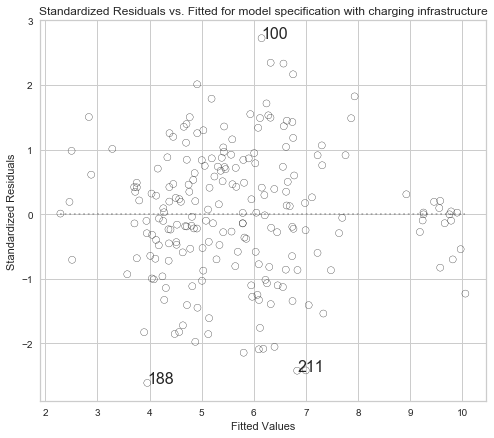

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Standardized Residuals'),
 Text(0.5, 1.0, 'Histogram of Standardized Residuals for model specification with charging infrastructure')]

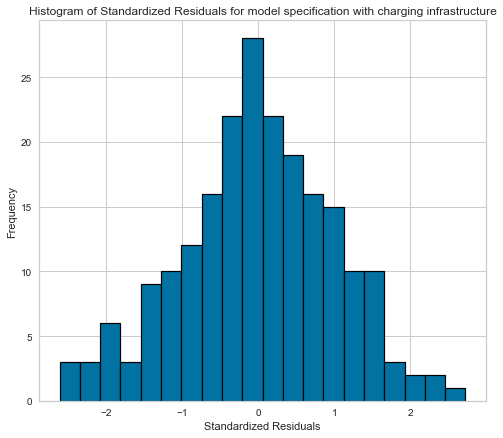

In [45]:

standardized_residuals=pd.Series(regressor_OLS.get_influence().resid_studentized_internal)
fitted = regressor_OLS.fittedvalues
top3 = abs(standardized_residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, standardized_residuals, edgecolors = 'k', facecolors = 'none')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Standardized Residuals vs. Fitted for model specification with charging infrastructure')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],standardized_residuals[i]))

plt.show()

plt.hist(standardized_residuals, bins=20, edgecolor='black', linewidth=1.2)
plt.gca().set(title='Histogram of Standardized Residuals for model specification with charging infrastructure', xlabel='Standardized Residuals', ylabel='Frequency')


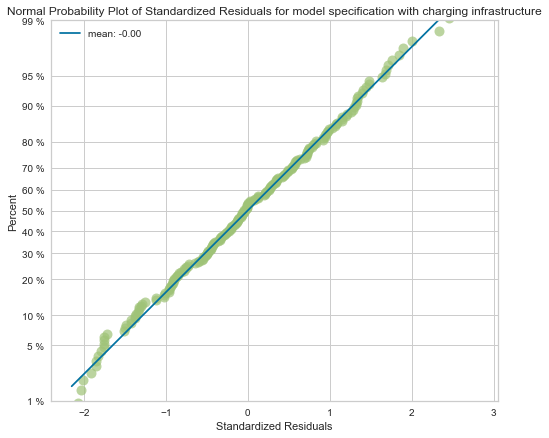

In [23]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    import statsmodels.api as sm

    #import data
    #full_data = pd.read_excel('Full Data.xlsx', sheet_name=0)

    #values=full_data['ln BEV reg-ns'].values
    values=standardized_residuals
        
    values.sort_values()

    #calculate empirical CDF
    cumprob = sm.distributions.ECDF(values)(values)

    #fit data
    loc, scale = stats.norm.fit(values)
    pffit = stats.norm(loc=loc,scale=scale)

    x = np.linspace(values.min(),values.max(),3)
    ax = plt.subplot(111)
    ax.plot(values,cumprob, 'go', alpha=0.7, markersize=10)
    ax.plot(x,pffit.cdf(x),'-',label='mean: {:.2f}'.format(loc))
    ax.set_yscale('ppf')
    ax.set_ylim(0.01,0.99)
    ax.grid(True)
    ax.legend(loc=0)
    plt.gca().set(title='Normal Probability Plot of Standardized Residuals for model specification with charging infrastructure', xlabel='Standardized Residuals', ylabel='Percent')
    plt.show()

Model specification with fast-charging infrastructure: Step 1

In [24]:
import statsmodels.formula.api as sm
file="ModelSpecification_b1.xlsx"
dataset = pd.read_excel(file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
regressor_OLS = sm.ols(formula='y~X', data=dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     59.54
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.15e-33
Time:                        21:40:28   Log-Likelihood:                -371.54
No. Observations:                 212   AIC:                             753.1
Df Residuals:                     207   BIC:                             769.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1399      2.411     -0.473      0.637      -5.893       3.613
X[0]        1.555e-05   3.05e-05      0.510      0.611   -4.46e-05    7.57e-05
X[1]           1.4208      0.379      3.751      0.000       0.674       2.168
X[2]           0.7014      0.072      9.696      0.000       0.559       0.844
X[3]          -0.4874      0.349     -1.395      0.164      -1.176       0.201
==============================================================================
Omnibus:                        1.071   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                1.177
Skew:                          -0.135   Prob(JB):                        0.555
Kurtosis:                       2.755   Cond. No.                     1.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model specification with fast-charging infrastructure: Step 2

In [33]:
import statsmodels.formula.api as sm
file="ModelSpecification_b2.xlsx"
dataset = pd.read_excel(file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values
regressor_OLS = sm.ols(formula='y~X', data=dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     33.46
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.95e-33
Time:                        21:53:38   Log-Likelihood:                -363.57
No. Observations:                 212   AIC:                             745.1
Df Residuals:                     203   BIC:                             775.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9591      1.408     -3.521      0.001      -7.736      -2.182
X[0]        2.502e-05   3.14e-05      0.797      0.426   -3.69e-05    8.69e-05
X[1]           1.2363      0.265      4.660      0.000       0.713       1.759
X[2]           0.6078      0.087      7.005      0.000       0.437       0.779
X[3]       -3.317e-05   2.58e-05     -1.283      0.201   -8.41e-05    1.78e-05
X[4]           0.3690      0.292      1.264      0.208      -0.206       0.944
X[5]          -0.3813      0.260     -1.469      0.143      -0.893       0.131
X[6]           0.5999      0.287      2.094      0.038       0.035       1.165
X[7]           0.8839      0.325      2.716      0.007       0.242       1.525
==============================================================================
Omnibus:                        1.000   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                1.035
Skew:                          -0.163   Prob(JB):                        0.596
Kurtosis:                       2.895   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model specification with fast-charging infrastructure: Step 3

In [34]:
import statsmodels.formula.api as sm
file="ModelSpecification_b3.xlsx"
dataset = pd.read_excel(file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 12].values
regressor_OLS = sm.ols(formula='y~X', data=dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     26.62
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           3.62e-35
Time:                        21:54:56   Log-Likelihood:                -351.21
No. Observations:                 212   AIC:                             728.4
Df Residuals:                     199   BIC:                             772.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6104      2.479     -3.877      0.000     -14.498      -4.722
X[0]       -4.064e-05    3.6e-05     -1.129      0.260      -0.000    3.04e-05
X[1]           1.4397      0.260      5.536      0.000       0.927       1.953
X[2]           0.5838      0.091      6.417      0.000       0.404       0.763
X[3]       -6.336e-05   2.57e-05     -2.464      0.015      -0.000   -1.26e-05
X[4]           0.0615      0.288      0.213      0.831      -0.507       0.630
X[5]          -0.4931      0.265     -1.859      0.065      -1.016       0.030
X[6]           0.9198      0.349      2.634      0.009       0.231       1.608
X[7]           0.0014      0.000      4.903      0.000       0.001       0.002
X[8]           0.3326      0.503      0.661      0.510      -0.660       1.325
X[9]           0.0670      0.032      2.114      0.036       0.004       0.130
X[10]          0.0244      0.018      1.377      0.170      -0.011       0.059
X[11]          0.6286      0.454      1.385      0.168      -0.267       1.524
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.388
Skew:                          -0.096   Prob(JB):                        0.824
Kurtosis:                       2.914   Cond. No.                     2.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model specification with fast-charging infrastructure: Step 4

In [35]:
import statsmodels.formula.api as sm
file="ModelSpecification_b4.xlsx"
dataset = pd.read_excel(file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 10].values
regressor_OLS = sm.ols(formula='y~X', data=dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     31.77
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.85e-36
Time:                        22:02:08   Log-Likelihood:                -352.23
No. Observations:                 212   AIC:                             726.5
Df Residuals:                     201   BIC:                             763.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.2598      1.993     -4.144      0.000     -12.190      -4.329
X[0]       -3.382e-05   3.41e-05     -0.991      0.323      -0.000    3.35e-05
X[1]           1.4036      0.255      5.495      0.000       0.900       1.907
X[2]           0.5839      0.087      6.712      0.000       0.412       0.755
X[3]       -6.118e-05   2.55e-05     -2.398      0.017      -0.000   -1.09e-05
X[4]           0.0978      0.286      0.342      0.733      -0.467       0.663
X[5]          -0.4730      0.265     -1.786      0.076      -0.995       0.049
X[6]           1.0078      0.324      3.113      0.002       0.370       1.646
X[7]           0.0012      0.000      4.760      0.000       0.001       0.002
X[8]           0.0499      0.027      1.852      0.065      -0.003       0.103
X[9]           0.7946      0.312      2.543      0.012       0.179       1.411
==============================================================================
Omnibus:                        1.557   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.473
Skew:                          -0.204   Prob(JB):                        0.479
Kurtosis:                       2.972   Cond. No.                     1.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model specification with fast-charging infrastructure: Step 5

In [36]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 10]
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    #X_1 = sm.add_constant(X_1)
    model = sm.ols(formula='y~X', data=dataset).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['ln dr range', 'ln fast ch st-ns', 'VAT Amount (in $)', 'Reduction (company car tax)', 'Urban density', 'BEV models available', 'HOV/Bus lane access (yes/no)']


In [37]:
import statsmodels.formula.api as sm
file="ModelSpecification_b5.xlsx"
dataset = pd.read_excel(file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 7].values
regressor_OLS = sm.ols(formula='y~X', data=dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     44.45
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           8.72e-38
Time:                        22:12:01   Log-Likelihood:                -354.51
No. Observations:                 212   AIC:                             725.0
Df Residuals:                     204   BIC:                             751.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7871      1.964     -4.474      0.000     -12.660      -4.915
X[0]           1.3256      0.254      5.228      0.000       0.826       1.826
X[1]           0.5990      0.074      8.058      0.000       0.452       0.746
X[2]       -5.516e-05   2.54e-05     -2.174      0.031      -0.000   -5.14e-06
X[3]           0.6724      0.269      2.502      0.013       0.143       1.202
X[4]           0.0010      0.000      4.667      0.000       0.001       0.001
X[5]           0.0661      0.026      2.587      0.010       0.016       0.116
X[6]           0.7064      0.303      2.335      0.021       0.110       1.303
==============================================================================
Omnibus:                        0.534   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.619
Skew:                          -0.115   Prob(JB):                        0.734
Kurtosis:                       2.869   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Graph 3.1. Residual plots for model specification with fast-charging infrastructure (Step 5)

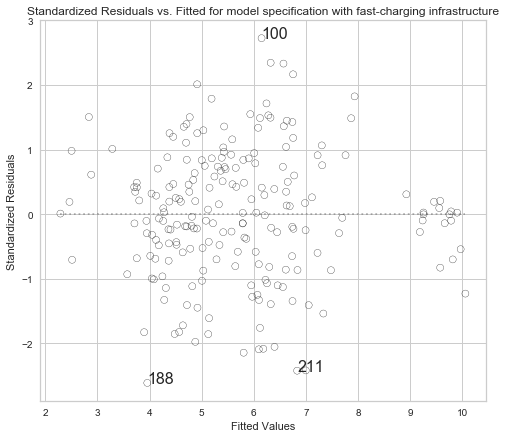

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Standardized Residuals'),
 Text(0.5, 1.0, 'Histogram of Standardized Residuals for model specification with fast-charging infrastructure')]

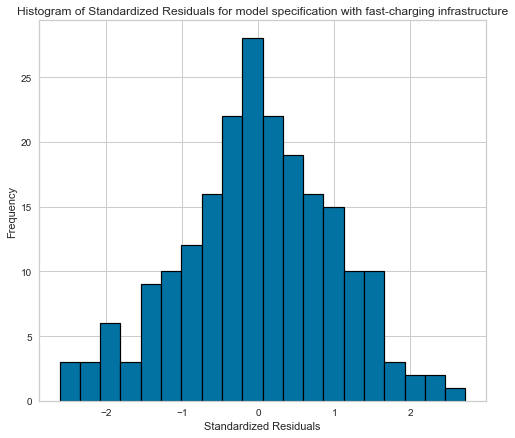

In [46]:

standardized_residuals=pd.Series(regressor_OLS.get_influence().resid_studentized_internal)
fitted = regressor_OLS.fittedvalues
top3 = abs(standardized_residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, standardized_residuals, edgecolors = 'k', facecolors = 'none')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Standardized Residuals vs. Fitted for model specification with fast-charging infrastructure')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],standardized_residuals[i]))

plt.show()

plt.hist(standardized_residuals, bins=20, edgecolor='black', linewidth=1.2)
plt.gca().set(title='Histogram of Standardized Residuals for model specification with fast-charging infrastructure', xlabel='Standardized Residuals', ylabel='Frequency')


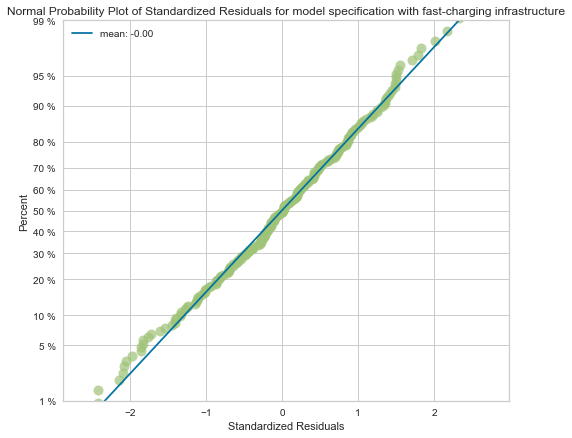

In [39]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    import statsmodels.api as sm

    #import data
    #full_data = pd.read_excel('Full Data.xlsx', sheet_name=0)

    #values=full_data['ln BEV reg-ns'].values
    values=standardized_residuals
        
    values.sort_values()

    #calculate empirical CDF
    cumprob = sm.distributions.ECDF(values)(values)

    #fit data
    loc, scale = stats.norm.fit(values)
    pffit = stats.norm(loc=loc,scale=scale)

    x = np.linspace(values.min(),values.max(),3)
    ax = plt.subplot(111)
    ax.plot(values,cumprob, 'go', alpha=0.7, markersize=10)
    ax.plot(x,pffit.cdf(x),'-',label='mean: {:.2f}'.format(loc))
    ax.set_yscale('ppf')
    #ax.set_xlim(-15000, 30100)
    ax.set_ylim(0.01,0.99)
    ax.grid(True)
    ax.legend(loc=0)
    plt.gca().set(title='Normal Probability Plot of Standardized Residuals for model specification with fast-charging infrastructure', xlabel='Standardized Residuals', ylabel='Percent')
    plt.show()